In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots 


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.sample(3)

,brand,model,price_in_pln,mileage,gearbox,engine_capacity,fuel_type,city,voivodeship,year
27140,kia,Kia Picanto 1.0 GT Line,37999.0,26 886 km,manual,1 368 cm3,Benzyna,Koszalin,Zachodniopomorskie,2018
49884,opel,Opel Astra VI 1.2 T Elegance S&S,110400.0,1 km,manual,1 199 cm3,Benzyna,Konin,Wielkopolskie,2022
67756,skoda,Skoda Octavia 1.5 TSI ACT Ambition,99900.0,29 854 km,manual,1 498 cm3,Benzyna,Warszawa,Mazowieckie,2021


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91523 entries, 0 to 91522
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            91523 non-null  object 
 1   model            91523 non-null  object 
 2   price_in_pln     91523 non-null  float64
 3   mileage          91523 non-null  object 
 4   gearbox          91523 non-null  object 
 5   engine_capacity  91523 non-null  object 
 6   fuel_type        91523 non-null  object 
 7   city             91523 non-null  object 
 8   voivodeship      91523 non-null  object 
 9   year             91523 non-null  object 
dtypes: float64(1), object(9)
memory usage: 7.0+ MB


In [5]:
df.nunique()

brand                 43
model              18641
price_in_pln        8289
mileage            14154
gearbox                2
engine_capacity      640
fuel_type           1267
city                4392
voivodeship           26
year                 349
dtype: int64

In [6]:
df.year.value_counts()

year
2018          6192
2017          5900
2019          5821
2016          5025
2023          4759
              ... 
49 990 km        1
122 000 km       1
33 000 km        1
102 000 km       1
12 830 km        1
Name: count, Length: 349, dtype: int64

## max and min price car for each brand 

In [7]:
max_price = df.groupby('brand').max().sort_values('price_in_pln',ascending = False)['price_in_pln'][:42].astype(int)
min_price = df.groupby('brand').min().sort_values('price_in_pln',ascending = False)['price_in_pln'][:42].astype(int)

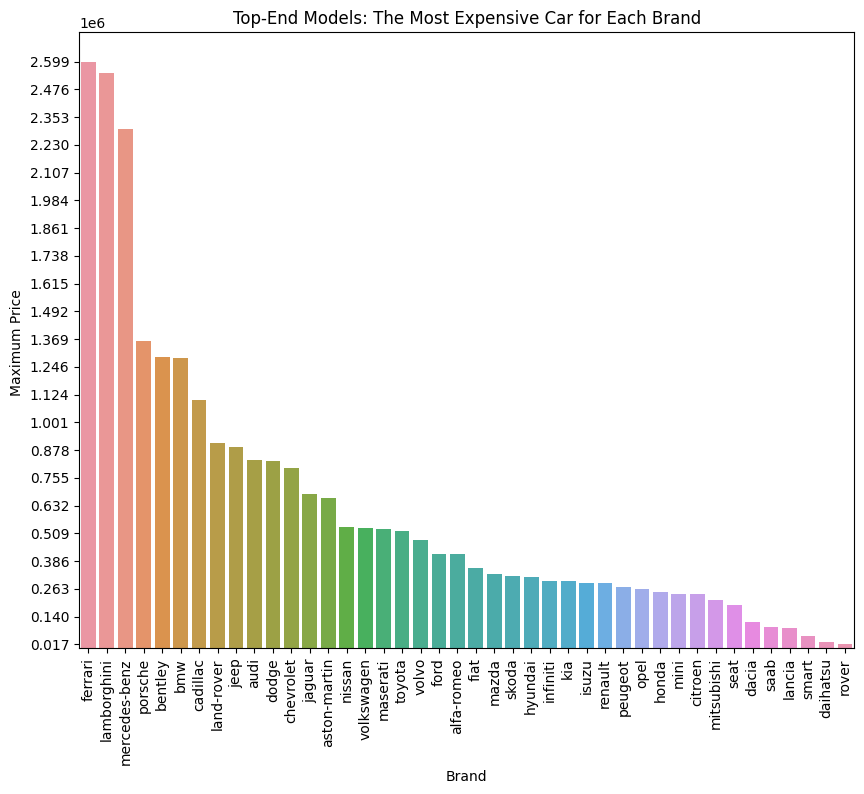

In [8]:
plt.figure(figsize = (10,8))
sns.barplot(x = max_price.index  , y = max_price.values)
plt.xticks(rotation=90)
plt.title("Top-End Models: The Most Expensive Car for Each Brand")
plt.ylabel("Maximum Price ")
plt.xlabel("Brand")
plt.yticks([i for i in range(max_price.min(),max_price.max(),122950)])
plt.show()

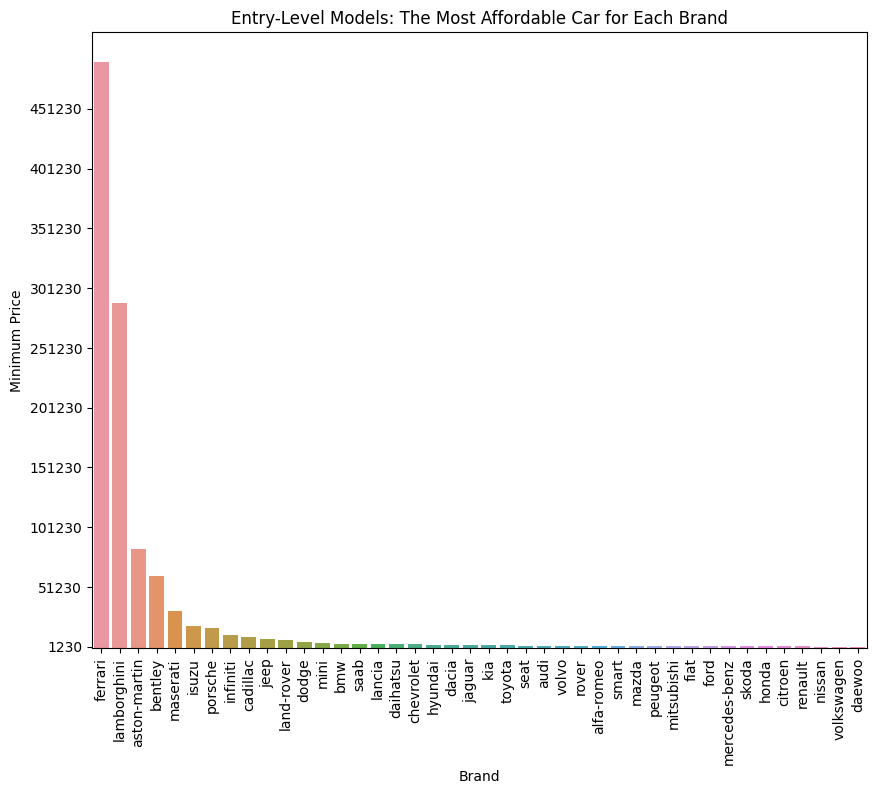

In [9]:
plt.figure(figsize = (10,8))
sns.barplot(x = min_price.index  , y = min_price.values)
plt.title("Entry-Level Models: The Most Affordable Car for Each Brand")
plt.ylabel("Minimum Price")
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.yticks([i for i in range(min_price.min(),min_price.max(),50000)])
plt.show()

In [10]:
price_gearbox = df.groupby('gearbox').agg(['min','max'])['price_in_pln']

fig = make_subplots(rows=1,cols=2,shared_xaxes=True,
                    subplot_titles = ('Minimum','Maximum'))
fig.add_trace(go.Bar(
                    x = price_gearbox.index,
                    y = price_gearbox['min'],
                    name = "Minimum" ),row=1,col=1)

fig.add_trace(go.Bar(
                    x = price_gearbox.index,
                    y = price_gearbox['max'],
                    name = "Maximum" ),row=1,col=2)

fig.update_layout(height=600, width=800,
                  title="Minimum and Maximum Values for Each Gearbox",
                  xaxis_title = 'Gearbox',
                  yaxis_title = 'Price',
                 title_x = 0.5 )
fig.update_xaxes(title_text = 'Gearbox')

### $100 US = 410.34000 PLN


In [15]:
df.brand.value_counts()

brand
volkswagen       11585
opel             10025
bmw               7835
mercedes-benz     7232
peugeot           6370
ford              5993
toyota            5839
renault           5300
volvo             5283
hyundai           3571
nissan            2848
kia               2524
seat              2063
honda             2034
citroen           1290
skoda             1232
mitsubishi        1017
land-rover        1012
jeep               888
fiat               701
mini               688
porsche            669
alfa-romeo         652
mazda              595
jaguar             577
audi               515
smart              488
dacia              403
infiniti           373
chevrolet          350
dodge              321
saab               231
isuzu              195
rover              174
maserati           119
lancia             109
bentley             95
daihatsu            87
daewoo              84
cadillac            63
ferrari             41
aston-martin        38
lamborghini         14
Name:

In [12]:
df.groupby('gearbox').agg(['min','max'])['price_in_pln']


,min,max
gearbox,,
automatic,1600.0,2599000.0
manual,1111.0,938520.0
